# 平日と休日の釣果比較

In [1]:
# モジュールのインポート

import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import datetime
import jpholiday
import sqlite3
import seaborn as sns

# グラフサイズ変更。既定より大きくする

plt.rcParams['figure.figsize'] = [10, 6]

# seaborn グラフにグリッド線を追加

sns.set()
sns.set_style("whitegrid", {'grid.linestyle': '--'})

In [2]:
# 大黒海釣り施設の2018年以降の釣果検索

conn = sqlite3.connect("../data/fishing_result.db")
sql = '''
select
    r.Date,
    r.Species,
    r.Point,
    r.Count,
    r.SizeMin,
    r.SizeMax,
    c.WaterTemp,
    c.Quantity
from
    fishing_results r,
    fishing_comments c
where
    r.Date = c.Date
    and r.Point = c.Point
    and r.Point = 'daikoku'
    and r.Date > '2018-01-01'
'''
df=pd.read_sql_query(sql, conn)
df.head()

,Date,Species,Point,Count,SizeMin,SizeMax,WaterTemp,Quantity
0,2018-01-02,ウミタナゴ,daikoku,19,15.0,25.0,12.0,161.0
1,2018-01-02,カサゴ,daikoku,17,12.0,22.0,12.0,161.0
2,2018-01-02,クジメ,daikoku,1,17.0,17.0,12.0,161.0
3,2018-01-02,シャコ,daikoku,1,15.0,15.0,12.0,161.0
4,2018-01-02,シロギス,daikoku,1,18.0,18.0,12.0,161.0


In [3]:
# 土日祝日化判定列を追加

df['Date'] = pd.to_datetime(df.Date)
def isBizDay(Date):
    if Date.weekday() >= 5 or jpholiday.is_holiday(Date):
        return 'Holiday'
    else:
        return 'WeekDay'

df['BizDay'] = df.apply(lambda x: isBizDay(x.Date), axis=1)

# 日付を索引にセットし、年、月カラムを追加

df = df.set_index('Date')
df['Year'] = df.index.year
df['Month'] = df.index.month
df['DayOfYear'] = df.index.dayofyear
df['WeekOfYear'] = df.index.strftime('%U').astype(int) # df3.index.week


In [4]:
# 日本語の文字化け対策のため、主要な魚種をローマ字に変換

def get_spieces_alphabet(spieces):
    if spieces == 'アジ':
        return 'Aji'
    elif spieces == 'クロダイ':
        return 'Kurodai'
    elif spieces == 'メジナ':
        return 'Mejina'
    elif spieces == 'メバル':
        return 'Mebaru'
    elif spieces == 'カサゴ':
        return 'Kasago'
    else:
        return 'Etc'

df['Species'] = df.apply(lambda x: get_spieces_alphabet(x.Species), axis=1)

df.head()

,Species,Point,Count,SizeMin,SizeMax,WaterTemp,Quantity,BizDay,Year,Month,DayOfYear,WeekOfYear
Date,,,,,,,,,,,,
2018-01-02,Etc,daikoku,19,15.0,25.0,12.0,161.0,WeekDay,2018,1,2,0
2018-01-02,Kasago,daikoku,17,12.0,22.0,12.0,161.0,WeekDay,2018,1,2,0
2018-01-02,Etc,daikoku,1,17.0,17.0,12.0,161.0,WeekDay,2018,1,2,0
2018-01-02,Etc,daikoku,1,15.0,15.0,12.0,161.0,WeekDay,2018,1,2,0
2018-01-02,Etc,daikoku,1,18.0,18.0,12.0,161.0,WeekDay,2018,1,2,0


# 魚種別釣果数の違い

<AxesSubplot:xlabel='Species', ylabel='Count'>

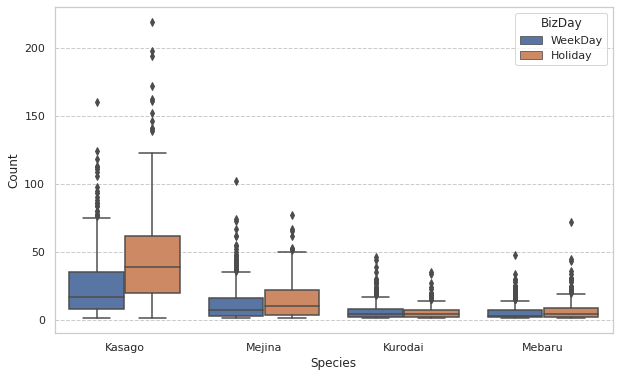

In [13]:
# アジ、その他の魚種の釣果を取り除く

df3 = df.query('Species != "Etc" and Species != "Aji"')

# 平日、休日の違い、魚種別釣果数

sns.boxplot(data=df3, x='Species', y='Count', hue='BizDay')

<AxesSubplot:xlabel='Species', ylabel='SizeMax'>

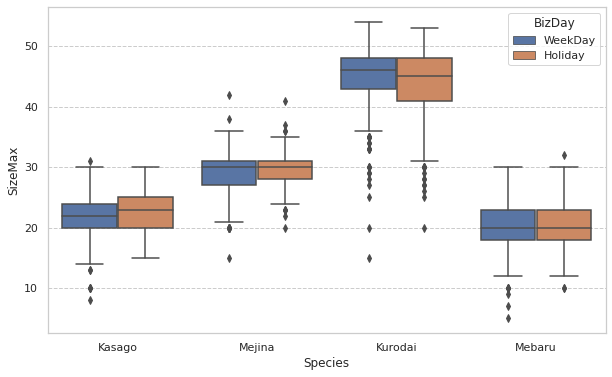

In [35]:
# 平日、休日の違い、魚種別釣果サイズ

sns.boxplot(data=df3, x='Species', y='SizeMax', hue='BizDay')

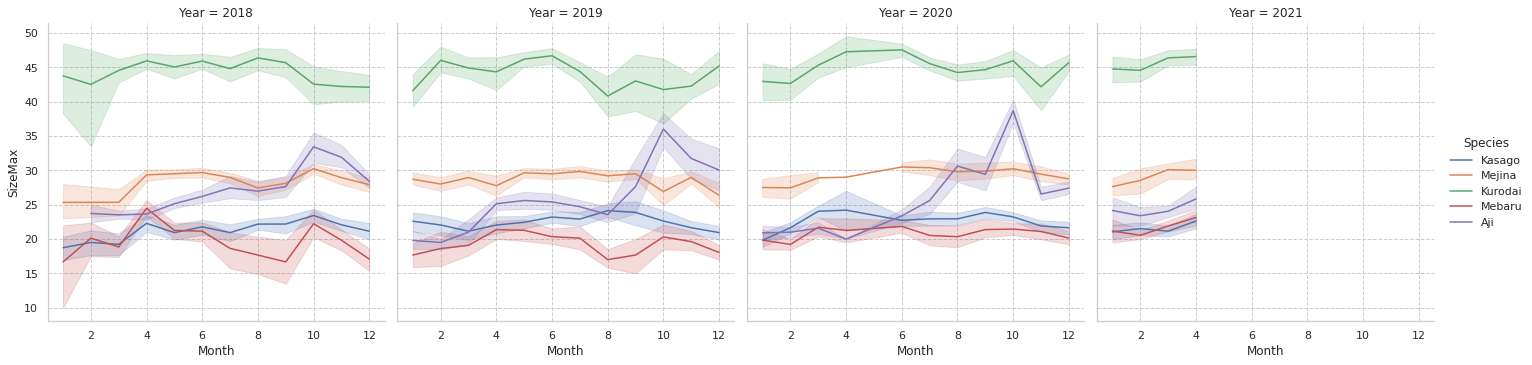

In [55]:
# 魚種別釣果サイズの推移
plt.rcParams['figure.figsize'] = [8, 10]
sns.relplot(data=df.query('Species!="Etc"'), x='Month', y='SizeMax', hue='Species', col='Year', kind='line')

<AxesSubplot:xlabel='Year', ylabel='Count'>

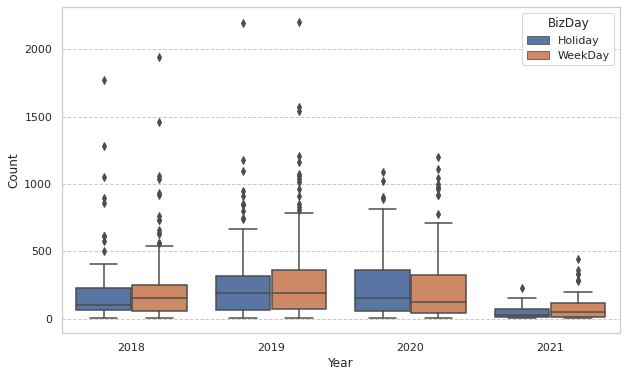

In [48]:
# アジの釣果のみ釣果数

df2 = df.query('Species == "Aji"')
sns.boxplot(data=df2, x='Year', y='Count', hue='BizDay')

<AxesSubplot:xlabel='Year', ylabel='SizeMax'>

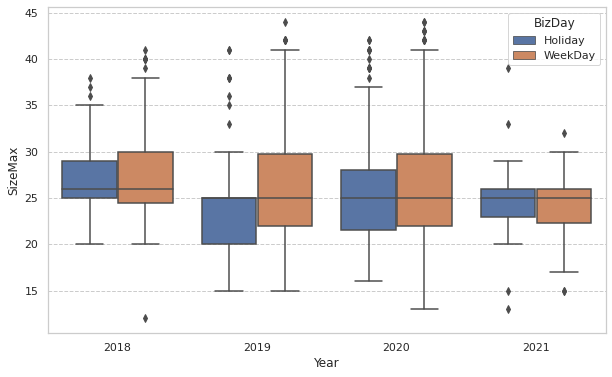

In [43]:

sns.boxplot(data=df2, x='Year', y='SizeMax', hue='BizDay')

<AxesSubplot:xlabel='Year', ylabel='SizeMax'>

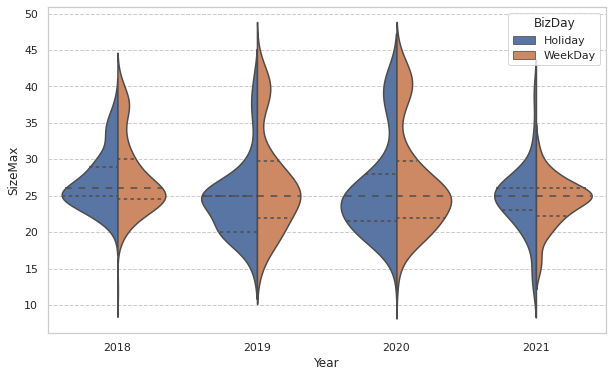

In [44]:
sns.violinplot(data = df2, x="Year", y="SizeMax", hue="BizDay", split=True, inner="quart")

<AxesSubplot:xlabel='Month', ylabel='SizeMax'>

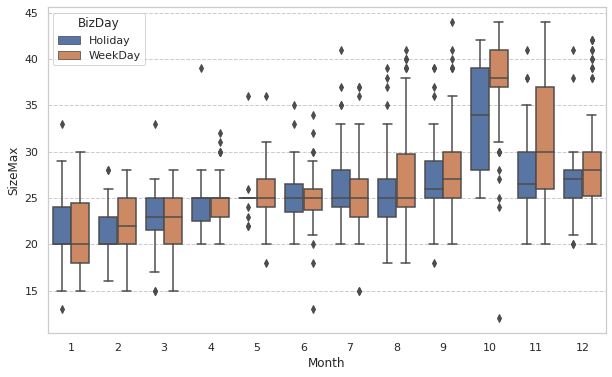

In [49]:
sns.boxplot(data=df2, x='Month', y='SizeMax', hue='BizDay')